In [1]:
import sys
LIBRARY_PATH = "/home/philipp/Repos/pg-ped"
sys.path.append(LIBRARY_PATH)

In [2]:
import numpy as np
import torch

from pg_ped.visualization.visualize_reward import vis_reward, Animator
from pg_ped.environment_construction.reward import (reward_accumulated_density,
                                                    reward_gravity,
                                                    reward_simplified)
from pg_ped.utils import get_initial_states_random_on_grid as get_initial_states

In [3]:
x_min, x_max, y_min, y_max = 0., 1.55, 0., 2.
start_line, goal_line = -1., 1.7
person_radius = 0.1
number_agents = 2

parameter_dict = {'time_per_step': 0.5,
                  'influence_radius': 5,
                  'standard_deviation': 0.1,
                  'person_radius': 0.10,
                  'soft_person_radius': 0.15,
                  'start_line': start_line,
                  'goal_line': goal_line,
                  'variables_per_agent_per_timestep': 4,
                  'backward_view': 3,
                  'device': 'cpu',
                  'x_min': x_min,
                  'x_max': x_max,
                  'y_min': y_min,
                  'y_max': y_max,
                  'maximum_speed_forward': 1.8,
                  'maximum_speed_backward': -0.3,
                  'runner_identities': [0]}

In [4]:
def array_to_list_of_tensors(arr: np.ndarray):
    l = arr.tolist()
    list_of_tensors = []
    for x in l:
        list_of_tensors += [torch.tensor(x)]
    return list_of_tensors

In [10]:
state_runner = [
    [(x_max - x_min) / 2., start_line + person_radius - 0, 0., 1.,
     (x_max - x_min) / 2., start_line + person_radius - 1, 0., 1.,
     (x_max - x_min) / 2., start_line + person_radius - 2, 0., 1.]
]
parameter_dict['y_max'] = goal_line
#states = get_initial_states(10, state_runner, number_agents=number_agents, **parameter_dict)
all_states = []
for i in range(20):
    all_states += array_to_list_of_tensors(np.load('sample_trajectory_' + str(i) + '.npy'))
parameter_dict['y_max'] = y_max

In [11]:
#vis_reward(reward_accumulated_density, states[0], 0, states[0], **parameter_dict)

In [12]:
animator = Animator(reward_accumulated_density, all_states, 0, vis_reward, all_states[0], **parameter_dict)

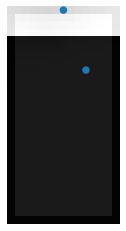

In [13]:
animator.animate()

In [9]:
all_states

[tensor([[ 0.7750, -0.9000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 1.1000,  0.4000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000]]),
 tensor([[ 0.9250, -0.7007,  0.0000,  0.0000,  0.7750, -0.9000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000],
         [ 1.1722,  0.4500,  0.0000,  0.0000,  1.1000,  0.4000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000]]),
 tensor([[ 1.0578, -0.5341,  0.0000,  0.0000,  0.9250, -0.7007,  0.0000,  0.0000,
           0.7750, -0.9000,  0.0000,  0.0000],
         [ 1.0718,  0.4858,  0.0000,  0.0000,  1.1722,  0.4500,  0.0000,  0.0000,
           1.1000,  0.4000,  0.0000,  0.0000]]),
 tensor([[ 1.1460, -0.4037,  0.0000,  0.0000,  1.0578, -0.5341,  0.0000,  0.0000,
           0.9250, -0.7007,  0.0000,  0.0000],
         [ 1.0595,  0.5480,  0.0000,  0.0000,  1.0718,  0.4858,  0.0000,  0.0000,
         